# Qiskit 설치 (colab에서는 새션이 새로 시작될 때, 코랩에서 제공하는 기본 패키지가 아니면, 새로 설치해야 함)!

In [2]:
from google.colab import output

!pip install qiskit
!pip install qiskit-ibm-runtime
!pip install qiskit[visualization]
!pip install qiskit-aer

output.clear()

# Phase-Flip 에러 정정

세번째 큐빗에 에러


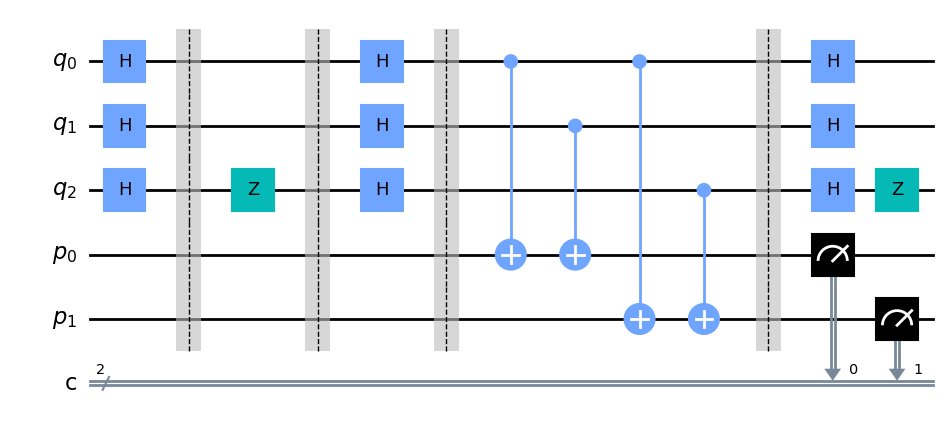

In [16]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

import random

error = random.randint(0,2)

qreg_q= QuantumRegister(3, 'q')
parity_q= QuantumRegister(2,'p')

creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, parity_q, creg_c)

# Initializaiton

n=3
circuit.h(range(n))  # 파이썬 range 함수 사용: qc.h(0), qc.h(1), ... qc.h(n) 을 만들어 줌

circuit.barrier()



circuit.z (qreg_q[error]) # 전송 중 Phase-Flip error 발생

circuit.barrier()


circuit.h(range(n))

circuit.barrier()
circuit.cx(qreg_q[0],parity_q[0])
circuit.cx(qreg_q[1],parity_q[0])

circuit.cx(qreg_q[0],parity_q[1])
circuit.cx(qreg_q[2],parity_q[1])
circuit.barrier()

circuit.h(range(n))  # 파이썬 range 함수 사용: qc.h(0), qc.h(1), ... qc.h(n) 을 만들어 줌


circuit.measure(parity_q[0], creg_c[0])
circuit.measure(parity_q[1], creg_c[1])

result = AerSimulator().run(circuit, shots=1, memory=True).result()
measurements = result.get_memory()
if measurements[0] == "00" :
  print('에러가 없음')
elif measurements[0] == "10" :
  print('세번째 큐빗에 에러')
  circuit.z(qreg_q[2])
elif measurements[0] == "01" :
  print('두번째 큐빗에 에러')
  circuit.z(qreg_q[1])
else :
  print('첫번째 큐빗에 에러')
  circuit.z(qreg_q[0])

display(circuit.draw("mpl"))


## 도이치 알고리즘

## 함수 오라클 $F_i$ 를 정의하기

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram

from qiskit import QuantumCircuit


def deutsch_function(case: int):
    """
    Generate a valid Deutsch function as a `QuantumCircuit`.
    """
    if case not in [0, 1, 2, 3]:
        raise ValueError("`case` must be 0, 1, 2, 3")

    f = QuantumCircuit(2)
    if case == 1 : f.cx(0, 1)
    elif case == 2 :
      f.cx(0,1)
      f.x(1)
    elif case == 3 : f.x(1)
    return f

In [ ]:
def deutsch_function(case: int):
    """
    Generate a valid Deutsch function as a `QuantumCircuit`.
    """
    if case not in [0, 1, 2, 3]:
        raise ValueError("`case` must be 0, 1, 2, 3")

    f = QuantumCircuit(2)
    if case in [1, 2]:
        f.cx(0, 1)
    if case in [2, 3]:
        f.x(1)
    return f


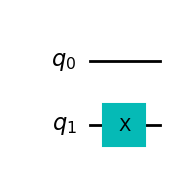

In [ ]:
deutsch_function(3).draw("mpl")

## 도이치 회로 구성

In [ ]:
def compile_circuit(function: QuantumCircuit):
    """
    Compiles a circuit for use in Deutsch's algorithm.
    """
    n = function.num_qubits - 1  # f-오라클의 큐빗 갯수를 읽음
    qc = QuantumCircuit(n + 1, n) # n+1 개의 큐빗과 y 를 제외한 n개의 큐빗에 대한 측정

    qc.x(n)
    qc.barrier()
    qc.h(range(n + 1))  # 파이썬 range 함수 사용: qc.h(0), qc.h(1), ... qc.h(n) 을 만들어 줌

    qc.barrier()
    qc.compose(function, inplace=True)
    qc.barrier()

    qc.h(range(n))  # 파이썬 range 함수 사용: qc.h(0), qc.h(1), ... qc.h(n-1) 을 만들어 줌
    qc.measure(range(n), range(n)) # 각 i=0,1, ... n-1 까지의 큐빗을 측정하여 클래시컬 비트로 저장

    return qc

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


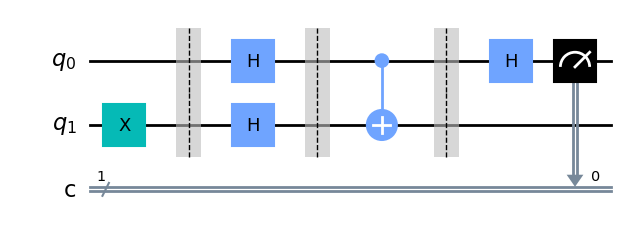

In [ ]:
i=1

compile_circuit(deutsch_function(i) ).draw("mpl")

# 도이치 알고리즘 적용

In [ ]:
from qiskit_aer import AerSimulator


def deutsch_algorithm(function: QuantumCircuit):
    """
    Determine if a Deutsch function is constant or balanced.
    """
    qc = compile_circuit(function)

    result = AerSimulator().run(qc, shots=1, memory=True).result()
    measurements = result.get_memory()
    if measurements[0] == "0":
        return "constant"
    return "balanced"

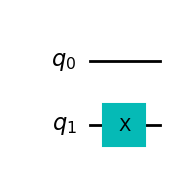

'constant'

In [ ]:
f = deutsch_function(3)
display(f.draw("mpl"))
deutsch_algorithm(f)

# 도이치 조사 알고리즘

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


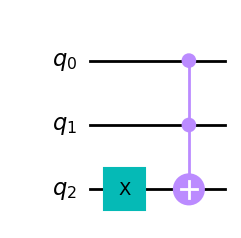

['1', '1', '1', '0']


In [98]:
n=2
test_qc = QuantumCircuit(n + 1)
test_qc.x(2)
test_qc.ccx(0,1,2)
display(test_qc.draw("mpl"))

def results_circuit(function: QuantumCircuit):

  output=[]
  n = function.num_qubits - 1

  def add_cx(qc, bit_string):
    for qubit, bit in enumerate(bit_string):
      if bit == "1":
        qc.x(qubit)
    return qc

  pos_states= range(2**n)
  binary = '0'+str(n)+'b'
  for state in pos_states:
    qc = QuantumCircuit(n + 1, 1)
    qc = add_cx(qc, format(state,binary))
    qc.compose(function, inplace=True)
    qc.measure(n, 0)
    result = AerSimulator().run(qc, shots=1, memory=True).result()
    measurements = result.get_memory()
    output.append(measurements[0])

  print(output)

results_circuit(test_qc)

## 함수 F 오라클을 만듬: 임의로 전체 큐빗의 반절을 선택하여 항등함수를 만들지 균형함수를 만들지 선택

In [17]:
from qiskit import QuantumCircuit
import numpy as np


def dj_function(num_qubits):
    """
    Create a random Deutsch-Jozsa function.
    """

    qc = QuantumCircuit(num_qubits + 1)  # 추가큐빗 y 를 고려해야 함.
    if np.random.randint(0, 2):
        # Flip output qubit with 50% chance
        qc.x(num_qubits)
    if np.random.randint(0, 2):
        # return constant circuit with 50% chance
        return qc

    # next, choose half the possible input states
    on_states = np.random.choice(
        range(2**num_qubits),  # numbers to sample from
        2**num_qubits // 2,  # number of samples
        replace=False,  # makes sure states are only sampled once
    )

    def add_cx(qc, bit_string):
        for qubit, bit in enumerate(reversed(bit_string)):
            if bit == "1":
                qc.x(qubit)
        return qc

    for state in on_states:
        qc.barrier()  # Barriers are added to help visualize how the functions are created. They can safely be removed.
        qc = add_cx(qc, f"{state:0b}")
        qc.mct(list(range(num_qubits)), num_qubits)
        qc = add_cx(qc, f"{state:0b}")

    qc.barrier()

    return qc

<ipython-input-17-a004931233bb>:34: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.mct()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.mcx as direct replacement.
  qc.mct(list(range(num_qubits)), num_qubits)


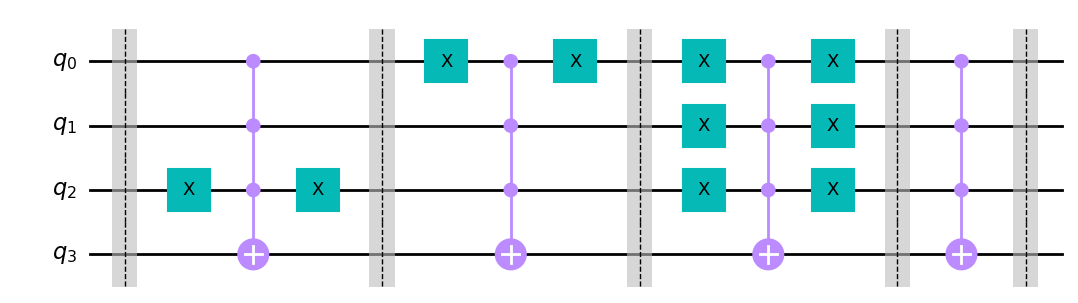

['1', '0', '0', '1', '0', '0', '1', '1']


In [103]:
f= dj_function(3)
display( f.draw("mpl") )

results_circuit(f)

In [104]:
def compile_circuit(function: QuantumCircuit):
    """
    Compiles a circuit for use in the Deutsch-Jozsa algorithm.
    """
    n = function.num_qubits - 1
    qc = QuantumCircuit(n + 1, n)
    qc.x(n)
    qc.h(range(n + 1))
    qc.compose(function, inplace=True)
    qc.h(range(n))
    qc.measure(range(n), range(n))
    return qc

In [105]:
from qiskit_aer import AerSimulator


def dj_algorithm(function: QuantumCircuit):
    """
    Determine if a Deutsch-Jozsa function is constant or balanced.
    """
    qc = compile_circuit(function)

    result = AerSimulator().run(qc, shots=1, memory=True).result()
    measurements = result.get_memory()
    if "1" in measurements[0]:
        return "balanced"
    return "constant"

dj_algorithm(f)

'balanced'